<a href="https://colab.research.google.com/github/RafsanJany-44/ARC_Machine/blob/main/PCA_FINAL_ML_Tunning_non_Synthetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
import numpy as np
import pandas as pd
dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/Tinnitus_ALR_EEG_features_2022.08.10_final.csv")

In [90]:
dataset.head()

,Subjects,Subject Type/Class,Test Type,Gap duration,n0_gap_peak_ms,p1_gap_peak_ms,n1_gap_peak_ms,p2_gap_peak_ms,n2_gap_peak_ms,p3_gap_peak_ms,...,Total EEG Power,Relative Alpha,Relative Beta,Relative Theta,Relative Delta,Relative Gamma,DTR,DTABR,ATR,ABR
0,'01_AJW_30_02',Control,Test,20ms,101,147,214,263,366,105,...,0.000032,0.1710,0.0955,0.561,0.152,0.0203,0.272,2.670,0.306,1.790
1,'01_CGO_63_01',Control,Test,20ms,132,155,217,301,383,131,...,0.000061,0.1330,0.1630,0.396,0.227,0.0804,0.574,2.100,0.336,0.814
2,'01_KBJ_45_01',Control,Test,20ms,107,160,221,305,396,128,...,0.000420,0.1520,0.3290,0.170,0.152,0.1980,0.895,0.669,0.894,0.461
3,'02_KCH_26_02',Control,Test,20ms,77,200,233,268,379,166,...,0.000334,0.0715,0.0599,0.227,0.591,0.0502,2.610,6.230,0.315,1.190
4,'03_HMK_49_01',Control,Test,20ms,153,128,224,264,337,147,...,0.000063,0.1470,0.1030,0.434,0.279,0.0377,0.643,2.860,0.338,1.420


In [91]:
X = dataset.iloc[:, 4:]
y = dataset.iloc[:, 1]

#X = dataset[['p3_gap_peak_amp','gap_auc_n1p2_R','p1_gap_peak_amp','n2_gap_peak_amp','n1p3_interval_nogap','gap_auc_n1p2_L','gap_auc_p1n1_R','p1p2_interval_nogap']]
#y = dataset["Subject Type/Class"]

In [92]:
X.shape

(330, 137)

Use components such that 95% of variance is retained


In [93]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(330, 7)

PCA created 7 components out of 137 original columns

In [94]:
pca.n_components_

7

Adding 7 components with real training data

In [95]:
PCA1=[]
PCA2=[]
PCA3=[]
PCA4=[]
PCA5=[]
PCA6=[]
PCA7=[]

for i in X_pca:
  PCA1.append(i[0])
  PCA2.append(i[1])
  PCA3.append(i[2])
  PCA4.append(i[3])
  PCA5.append(i[4])
  PCA6.append(i[5])
  PCA7.append(i[6])

X['PCA_1']=PCA1
X['PCA_2']=PCA2
X['PCA_3']=PCA3
X['PCA_4']=PCA4
X['PCA_5']=PCA5
X['PCA_6']=PCA6
X['PCA_7']=PCA7



In [96]:
X

,n0_gap_peak_ms,p1_gap_peak_ms,n1_gap_peak_ms,p2_gap_peak_ms,n2_gap_peak_ms,p3_gap_peak_ms,n0_nogap_peak_ms,p1_nogap_peak_ms,n1_nogap_peak_ms,p2_nogap_peak_ms,...,DTABR,ATR,ABR,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7
0,101,147,214,263,366,105,149,213,281,388,...,2.670,0.306,1.790,1339.560371,-697.546927,238.825762,30.060269,226.451278,-9.045645,81.949796
1,132,155,217,301,383,131,175,239,304,449,...,2.100,0.336,0.814,1578.879518,-391.887316,-15.068454,97.146096,-196.587087,-7.236216,101.517172
2,107,160,221,305,396,128,192,221,287,446,...,0.669,0.894,0.461,785.683575,906.275582,-12.436536,-130.145900,-249.719421,-78.340525,39.839775
3,77,200,233,268,379,166,120,231,289,320,...,6.230,0.315,1.190,-1269.439664,144.905413,-67.353262,22.209039,426.418423,-77.721359,-46.132217
4,153,128,224,264,337,147,176,235,286,364,...,2.860,0.338,1.420,-1011.793352,-61.573383,253.115839,-121.813302,-24.985447,14.175278,148.083068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,109,176,237,336,419,116,180,248,350,455,...,4.500,0.331,1.890,-790.787177,191.530894,140.432904,236.174118,127.788477,9.083791,-77.833843
326,174,214,238,314,435,173,198,239,300,456,...,3.170,0.369,0.983,-759.221474,10.306262,-201.071340,-261.659301,11.639871,-139.676763,95.330643
327,101,216,254,322,484,100,219,255,328,468,...,1.350,0.717,0.838,369.118639,43.428027,24.358051,45.067320,-14.110765,164.335110,-168.453164
328,104,181,241,336,390,108,181,288,330,421,...,5.690,0.272,1.550,-740.844391,-79.579532,482.747352,265.886521,233.202582,111.514214,129.885337


In [97]:
X.shape

(330, 144)

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [99]:
'''from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
 
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)'''

'from sklearn.preprocessing import StandardScaler\nsc = StandardScaler()\n \nX_train = sc.fit_transform(X_train)\nX_test = sc.transform(X_test)'

In [100]:
result={}

#Feature Selection

In [101]:
from sklearn.feature_selection import SelectKBest
bestfeatures = SelectKBest(k=10)
fit = bestfeatures.fit(X,y)

In [102]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [103]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [104]:

print(featureScores.nlargest(8,'Score'))  #print 8 best features

                  Specs      Score
47      p3_gap_peak_amp  45.163320
72       gap_auc_n1p2_R  45.064316
43      p1_gap_peak_amp  42.386323
46      n2_gap_peak_amp  39.547251
38  n1p3_interval_nogap  37.128241
74       gap_auc_n1p2_L  35.014730
69       gap_auc_p1n1_R  28.903982
33  p1p2_interval_nogap  27.769729




---





---



#ADABOOST

In [105]:
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["ADA Default"]=accuracy_score(y_test, y_pred)

[[30  9]
 [10 17]]
              precision    recall  f1-score   support

     Control       0.75      0.77      0.76        39
     Patient       0.65      0.63      0.64        27

    accuracy                           0.71        66
   macro avg       0.70      0.70      0.70        66
weighted avg       0.71      0.71      0.71        66

Accurecy:  0.7121212121212122


1/200 round completed......................... Accurecy: 0.7121212121212122
2/200 round completed......................... Accurecy: 0.7424242424242424
3/200 round completed......................... Accurecy: 0.7727272727272727
4/200 round completed......................... Accurecy: 0.7575757575757576
5/200 round completed......................... Accurecy: 0.7727272727272727
6/200 round completed......................... Accurecy: 0.7878787878787878
7/200 round completed......................... Accurecy: 0.7424242424242424
8/200 round completed......................... Accurecy: 0.7727272727272727
9/200 round completed......................... Accurecy: 0.7878787878787878
10/200 round completed......................... Accurecy: 0.7575757575757576
11/200 round completed......................... Accurecy: 0.7727272727272727
12/200 round completed......................... Accurecy: 0.7575757575757576
13/200 round completed......................... Accurecy: 0.7727272727272727
14/200 r

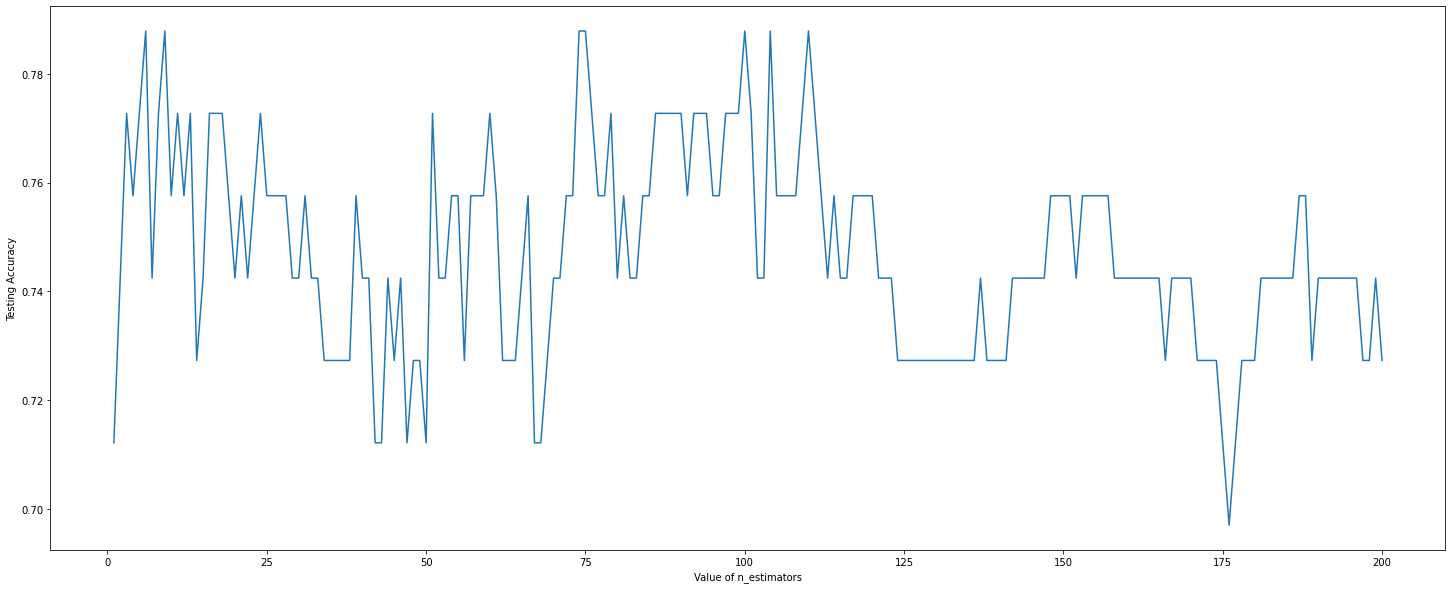

In [106]:
from sklearn.ensemble import AdaBoostClassifier
N=200
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [107]:
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(n_estimators=best_estimator,random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["ADA Best Estimator"]=accuracy_score(y_test, y_pred)

[[31  8]
 [ 6 21]]
              precision    recall  f1-score   support

     Control       0.84      0.79      0.82        39
     Patient       0.72      0.78      0.75        27

    accuracy                           0.79        66
   macro avg       0.78      0.79      0.78        66
weighted avg       0.79      0.79      0.79        66

Accurecy:  0.7878787878787878




---



---



#Graddient Boosting

In [108]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

classifier = GradientBoostingClassifier(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["Graddient Boosting Default"]=accuracy_score(y_test, y_pred)

[[31  8]
 [ 9 18]]
              precision    recall  f1-score   support

     Control       0.78      0.79      0.78        39
     Patient       0.69      0.67      0.68        27

    accuracy                           0.74        66
   macro avg       0.73      0.73      0.73        66
weighted avg       0.74      0.74      0.74        66

Accurecy:  0.7424242424242424


1/150 round completed......................... Accurecy: 0.6818181818181818
2/150 round completed......................... Accurecy: 0.6818181818181818
3/150 round completed......................... Accurecy: 0.7575757575757576
4/150 round completed......................... Accurecy: 0.7727272727272727
5/150 round completed......................... Accurecy: 0.7575757575757576
6/150 round completed......................... Accurecy: 0.7424242424242424
7/150 round completed......................... Accurecy: 0.7878787878787878
8/150 round completed......................... Accurecy: 0.7575757575757576
9/150 round completed......................... Accurecy: 0.7727272727272727
10/150 round completed......................... Accurecy: 0.7575757575757576
11/150 round completed......................... Accurecy: 0.7727272727272727
12/150 round completed......................... Accurecy: 0.7878787878787878
13/150 round completed......................... Accurecy: 0.803030303030303
14/150 ro

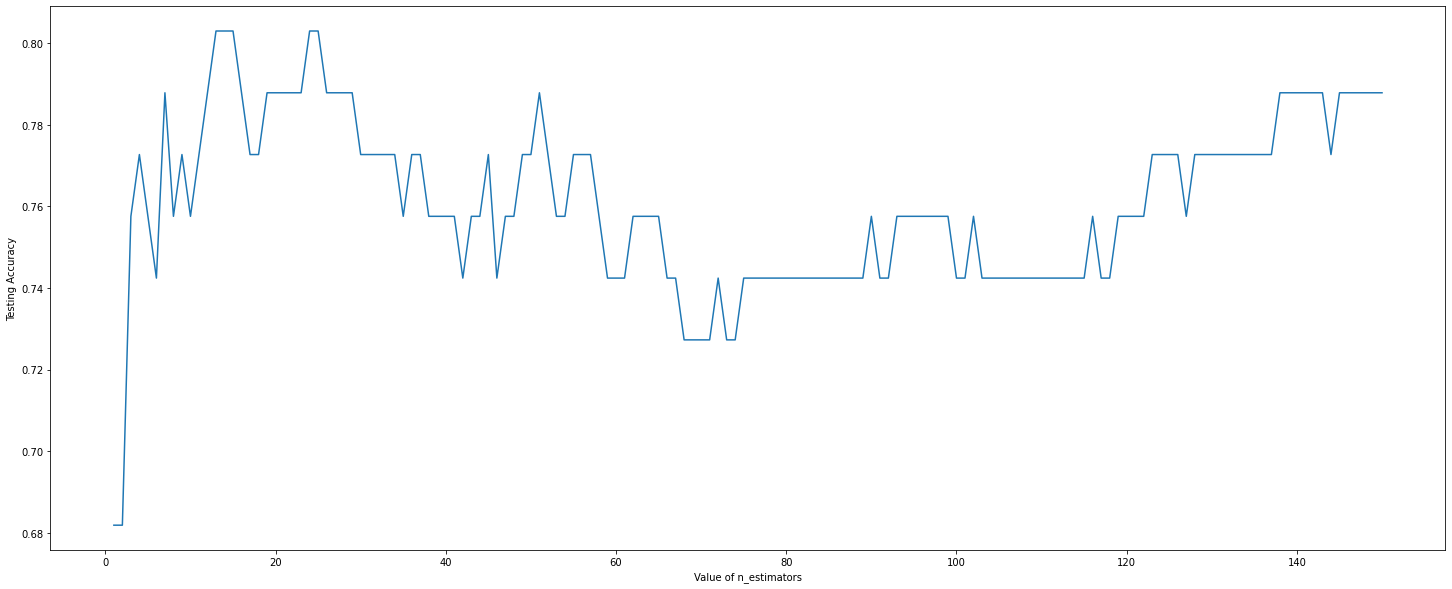

In [109]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/30 round completed......................... Accurecy: 0.7878787878787878
2/30 round completed......................... Accurecy: 0.7272727272727273
3/30 round completed......................... Accurecy: 0.7424242424242424
4/30 round completed......................... Accurecy: 0.7121212121212122
5/30 round completed......................... Accurecy: 0.7424242424242424
6/30 round completed......................... Accurecy: 0.7424242424242424
7/30 round completed......................... Accurecy: 0.7272727272727273
8/30 round completed......................... Accurecy: 0.696969696969697
9/30 round completed......................... Accurecy: 0.7272727272727273
10/30 round completed......................... Accurecy: 0.7272727272727273
11/30 round completed......................... Accurecy: 0.7272727272727273
12/30 round completed......................... Accurecy: 0.7272727272727273
13/30 round completed......................... Accurecy: 0.7272727272727273
14/30 round completed.

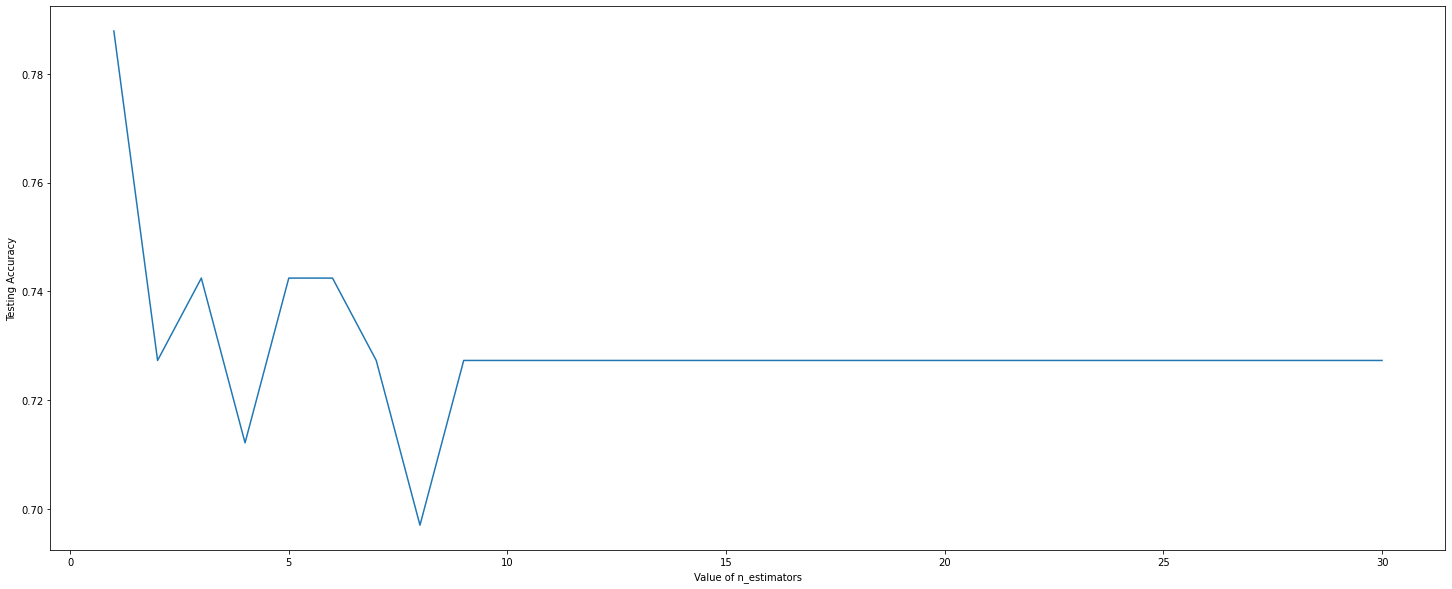

In [110]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=30
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [111]:
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["Graddient Best Estimator"]=accuracy_score(y_test, y_pred)

[[32  7]
 [ 6 21]]
              precision    recall  f1-score   support

     Control       0.84      0.82      0.83        39
     Patient       0.75      0.78      0.76        27

    accuracy                           0.80        66
   macro avg       0.80      0.80      0.80        66
weighted avg       0.80      0.80      0.80        66

Accurecy:  0.803030303030303


In [112]:
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier(max_depth=best_depth,random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result["Graddient Boost Best depth"]=accuracy_score(y_test, y_pred)

[[34  5]
 [ 9 18]]
              precision    recall  f1-score   support

     Control       0.79      0.87      0.83        39
     Patient       0.78      0.67      0.72        27

    accuracy                           0.79        66
   macro avg       0.79      0.77      0.77        66
weighted avg       0.79      0.79      0.78        66

Accurecy:  0.7878787878787878


In [113]:
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

result["Graddient Boosting ALL"]=accuracy_score(y_test, y_pred)

[[32  7]
 [ 6 21]]
              precision    recall  f1-score   support

     Control       0.84      0.82      0.83        39
     Patient       0.75      0.78      0.76        27

    accuracy                           0.80        66
   macro avg       0.80      0.80      0.80        66
weighted avg       0.80      0.80      0.80        66

Accurecy:  0.803030303030303




---



---



#KNN

In [114]:
from sklearn.neighbors import KNeighborsClassifier
KNN_class = KNeighborsClassifier()
KNN_class.fit(X_train, y_train)
y_pred=KNN_class.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["KNN Default"]=accuracy_score(y_test, y_pred)

[[33  6]
 [12 15]]
              precision    recall  f1-score   support

     Control       0.73      0.85      0.79        39
     Patient       0.71      0.56      0.63        27

    accuracy                           0.73        66
   macro avg       0.72      0.70      0.71        66
weighted avg       0.73      0.73      0.72        66

Accurecy:  0.7272727272727273


1/200 round completed......................... Accurecy: 0.6515151515151515
2/200 round completed......................... Accurecy: 0.6515151515151515
3/200 round completed......................... Accurecy: 0.7121212121212122
4/200 round completed......................... Accurecy: 0.696969696969697
5/200 round completed......................... Accurecy: 0.7272727272727273
6/200 round completed......................... Accurecy: 0.7121212121212122
7/200 round completed......................... Accurecy: 0.7727272727272727
8/200 round completed......................... Accurecy: 0.7575757575757576
9/200 round completed......................... Accurecy: 0.7727272727272727
10/200 round completed......................... Accurecy: 0.7121212121212122
11/200 round completed......................... Accurecy: 0.696969696969697
12/200 round completed......................... Accurecy: 0.6818181818181818
13/200 round completed......................... Accurecy: 0.6666666666666666
14/200 rou

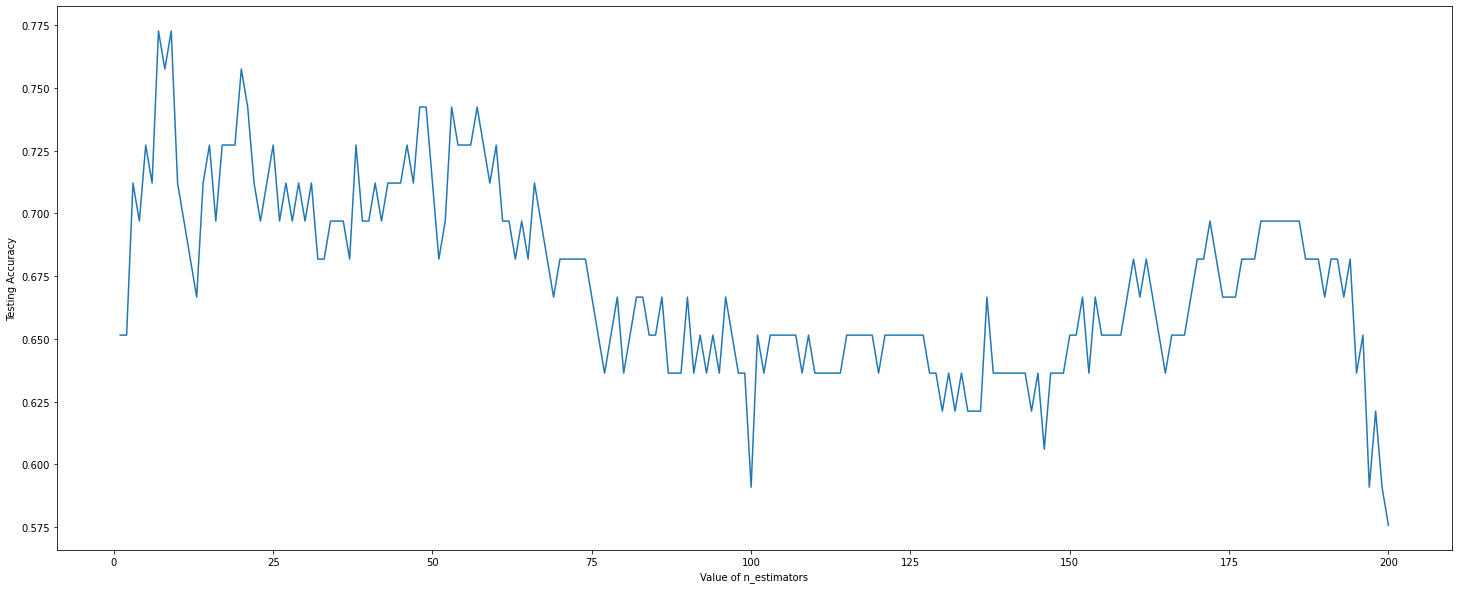

In [115]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Neighbors=200
k_range = range (1,Neighbors+1)
scores={}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred=knn.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(Neighbors)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best=list(scores.keys())[scores_list.index(max(scores_list))]
print(best)

In [116]:
from sklearn.neighbors import KNeighborsClassifier
KNN_class = KNeighborsClassifier(n_neighbors=best)
KNN_class.fit(X_train, y_train)
y_pred=KNN_class.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["KNN Best Neighbors"]=accuracy_score(y_test, y_pred)

[[36  3]
 [12 15]]
              precision    recall  f1-score   support

     Control       0.75      0.92      0.83        39
     Patient       0.83      0.56      0.67        27

    accuracy                           0.77        66
   macro avg       0.79      0.74      0.75        66
weighted avg       0.78      0.77      0.76        66

Accurecy:  0.7727272727272727




---



---



#Random Forest

In [117]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["Random Forest Default"]=accuracy_score(y_test, y_pred)

[[33  6]
 [ 8 19]]
              precision    recall  f1-score   support

     Control       0.80      0.85      0.83        39
     Patient       0.76      0.70      0.73        27

    accuracy                           0.79        66
   macro avg       0.78      0.77      0.78        66
weighted avg       0.79      0.79      0.79        66

Accurecy:  0.7878787878787878


1/150 round completed......................... Accurecy: 0.6212121212121212
2/150 round completed......................... Accurecy: 0.6666666666666666
3/150 round completed......................... Accurecy: 0.696969696969697
4/150 round completed......................... Accurecy: 0.6515151515151515
5/150 round completed......................... Accurecy: 0.7121212121212122
6/150 round completed......................... Accurecy: 0.7121212121212122
7/150 round completed......................... Accurecy: 0.6818181818181818
8/150 round completed......................... Accurecy: 0.696969696969697
9/150 round completed......................... Accurecy: 0.7272727272727273
10/150 round completed......................... Accurecy: 0.7121212121212122
11/150 round completed......................... Accurecy: 0.7424242424242424
12/150 round completed......................... Accurecy: 0.7424242424242424
13/150 round completed......................... Accurecy: 0.7575757575757576
14/150 rou

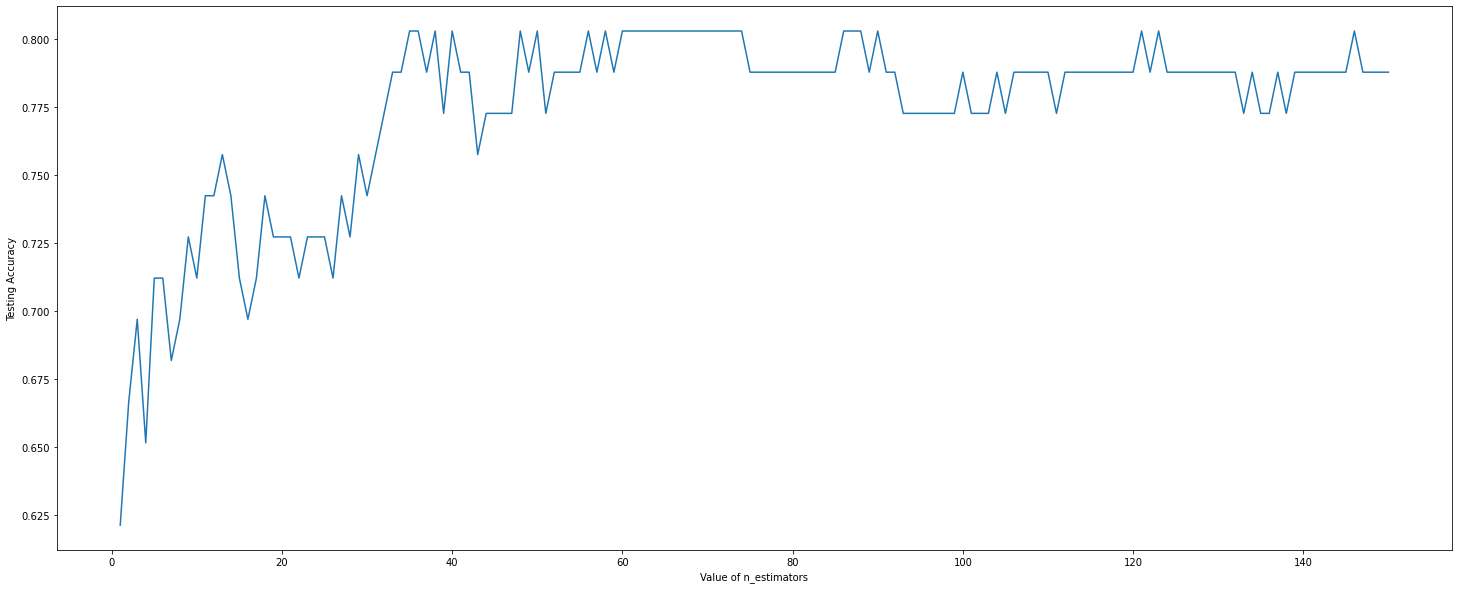

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/150 round completed......................... Accurecy: 0.7575757575757576
2/150 round completed......................... Accurecy: 0.7727272727272727
3/150 round completed......................... Accurecy: 0.7878787878787878
4/150 round completed......................... Accurecy: 0.803030303030303
5/150 round completed......................... Accurecy: 0.8181818181818182
6/150 round completed......................... Accurecy: 0.7878787878787878
7/150 round completed......................... Accurecy: 0.7878787878787878
8/150 round completed......................... Accurecy: 0.8181818181818182
9/150 round completed......................... Accurecy: 0.803030303030303
10/150 round completed......................... Accurecy: 0.7878787878787878
11/150 round completed......................... Accurecy: 0.803030303030303
12/150 round completed......................... Accurecy: 0.7727272727272727
13/150 round completed......................... Accurecy: 0.7878787878787878
14/150 roun

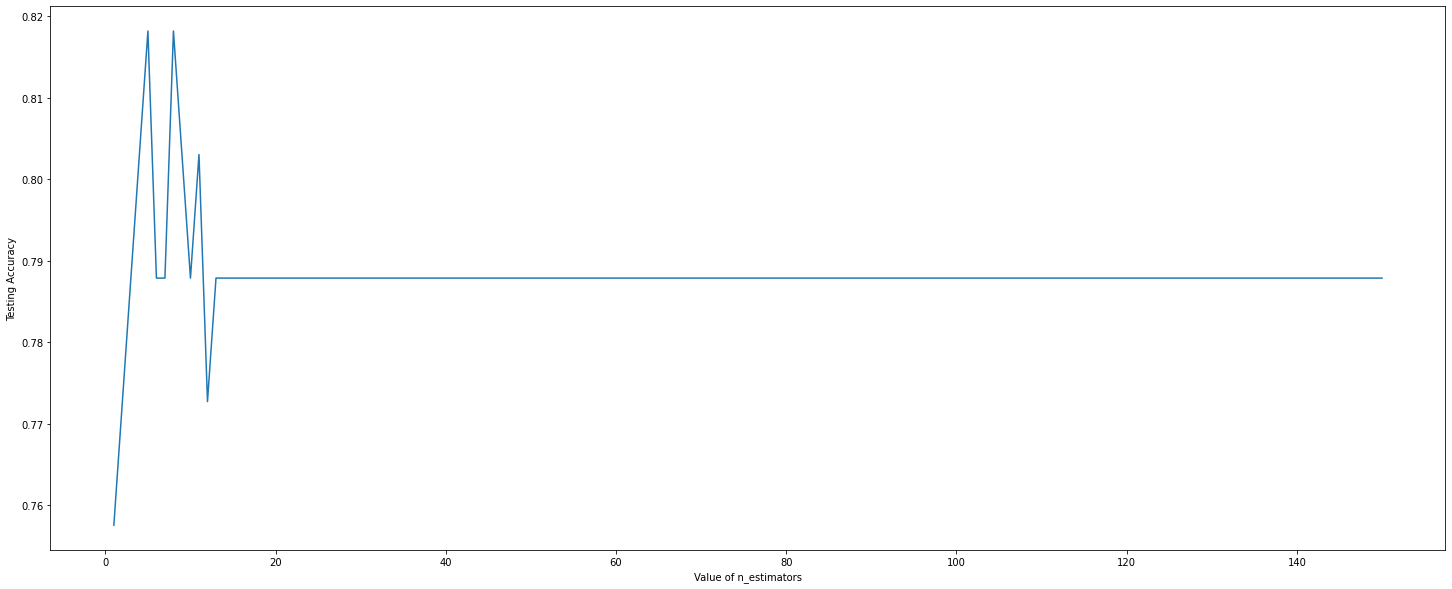

In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [120]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["Random Forest Best Estimator"]=accuracy_score(y_test, y_pred)

[[35  4]
 [ 9 18]]
              precision    recall  f1-score   support

     Control       0.80      0.90      0.84        39
     Patient       0.82      0.67      0.73        27

    accuracy                           0.80        66
   macro avg       0.81      0.78      0.79        66
weighted avg       0.80      0.80      0.80        66

Accurecy:  0.803030303030303


In [121]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=best_depth,random_state=0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["Random Forest Best Max Depth"]=accuracy_score(y_test, y_pred)

[[33  6]
 [ 6 21]]
              precision    recall  f1-score   support

     Control       0.85      0.85      0.85        39
     Patient       0.78      0.78      0.78        27

    accuracy                           0.82        66
   macro avg       0.81      0.81      0.81        66
weighted avg       0.82      0.82      0.82        66

Accurecy:  0.8181818181818182


In [122]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["Random Forest All"]=accuracy_score(y_test, y_pred)

[[32  7]
 [10 17]]
              precision    recall  f1-score   support

     Control       0.76      0.82      0.79        39
     Patient       0.71      0.63      0.67        27

    accuracy                           0.74        66
   macro avg       0.74      0.73      0.73        66
weighted avg       0.74      0.74      0.74        66

Accurecy:  0.7424242424242424




---



---



#XGB

In [123]:


import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(random_state=0)
xgb_classifier.fit(X_train,y_train)
y_pred = xgb_classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["XGB Deafult"]=accuracy_score(y_test, y_pred)

[[30  9]
 [ 9 18]]
              precision    recall  f1-score   support

     Control       0.77      0.77      0.77        39
     Patient       0.67      0.67      0.67        27

    accuracy                           0.73        66
   macro avg       0.72      0.72      0.72        66
weighted avg       0.73      0.73      0.73        66

Accurecy:  0.7272727272727273


1/250 round completed......................... Accurecy: 0.7424242424242424
2/250 round completed......................... Accurecy: 0.7727272727272727
3/250 round completed......................... Accurecy: 0.8181818181818182
4/250 round completed......................... Accurecy: 0.7878787878787878
5/250 round completed......................... Accurecy: 0.7727272727272727
6/250 round completed......................... Accurecy: 0.803030303030303
7/250 round completed......................... Accurecy: 0.7727272727272727
8/250 round completed......................... Accurecy: 0.7727272727272727
9/250 round completed......................... Accurecy: 0.7727272727272727
10/250 round completed......................... Accurecy: 0.7727272727272727
11/250 round completed......................... Accurecy: 0.7575757575757576
12/250 round completed......................... Accurecy: 0.7575757575757576
13/250 round completed......................... Accurecy: 0.7878787878787878
14/250 ro

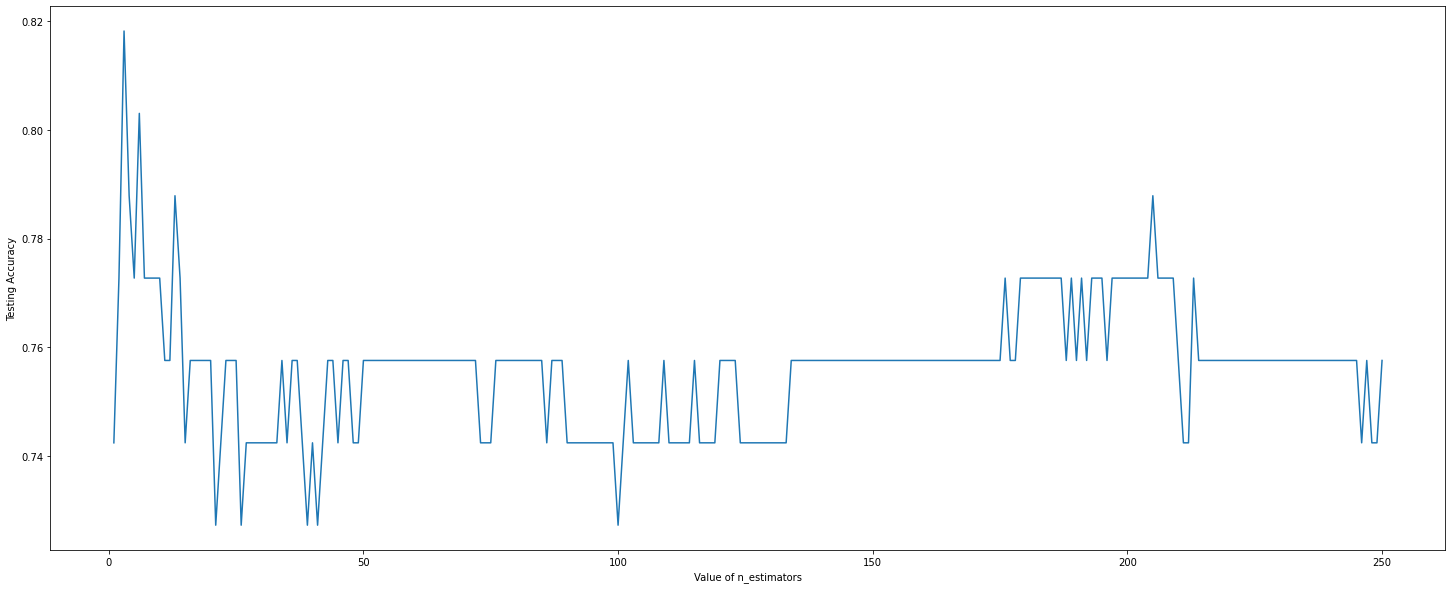

In [124]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

1/250 round completed......................... Accurecy: 0.7727272727272727
2/250 round completed......................... Accurecy: 0.7575757575757576
3/250 round completed......................... Accurecy: 0.7272727272727273
4/250 round completed......................... Accurecy: 0.7727272727272727
5/250 round completed......................... Accurecy: 0.7878787878787878
6/250 round completed......................... Accurecy: 0.7878787878787878
7/250 round completed......................... Accurecy: 0.7878787878787878
8/250 round completed......................... Accurecy: 0.803030303030303
9/250 round completed......................... Accurecy: 0.7727272727272727
10/250 round completed......................... Accurecy: 0.7727272727272727
11/250 round completed......................... Accurecy: 0.7727272727272727
12/250 round completed......................... Accurecy: 0.7727272727272727
13/250 round completed......................... Accurecy: 0.7727272727272727
14/250 ro

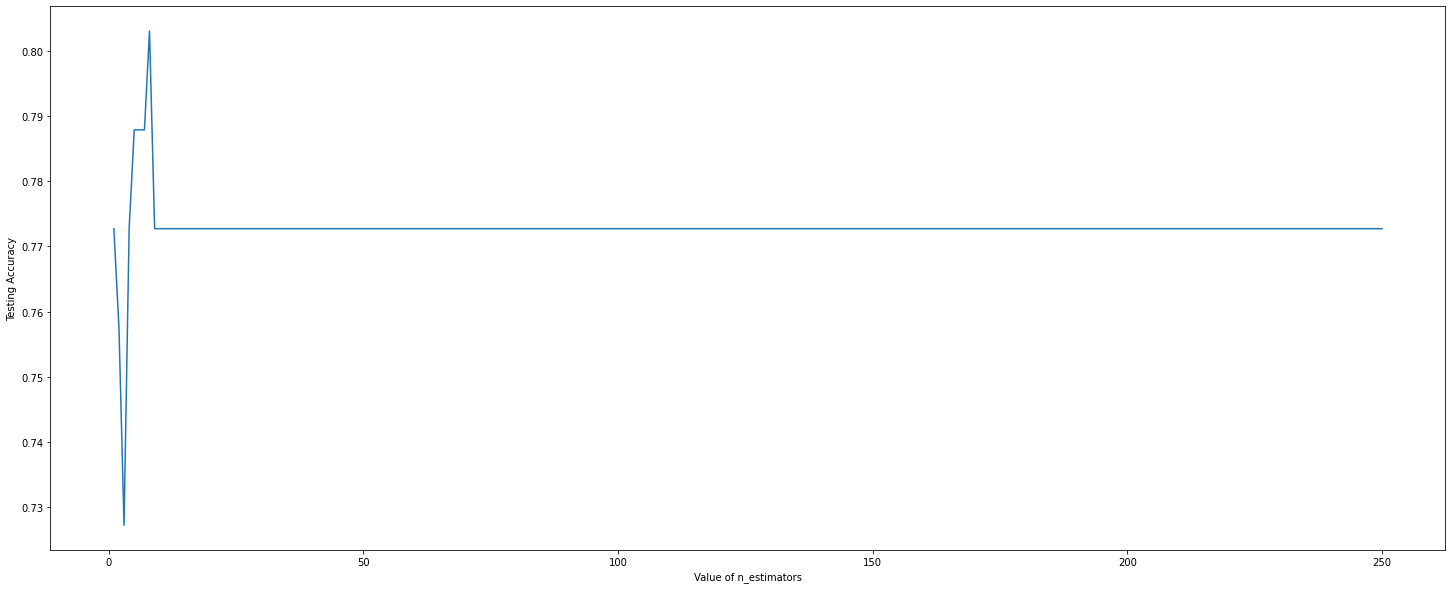

In [125]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  xgb_classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  xgb_classifier.fit(X_train, y_train)
  y_pred=xgb_classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [126]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(max_depth=best_depth,random_state=0)
xgb_classifier.fit(X_train,y_train)
y_pred = xgb_classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["XGB Best Depth"]=accuracy_score(y_test, y_pred)

[[33  6]
 [ 7 20]]
              precision    recall  f1-score   support

     Control       0.82      0.85      0.84        39
     Patient       0.77      0.74      0.75        27

    accuracy                           0.80        66
   macro avg       0.80      0.79      0.80        66
weighted avg       0.80      0.80      0.80        66

Accurecy:  0.803030303030303


In [127]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(n_estimators=best_estimator,random_state=0)
xgb_classifier.fit(X_train,y_train)
y_pred = xgb_classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["XGB Best Estimator"]=accuracy_score(y_test, y_pred)

[[31  8]
 [ 4 23]]
              precision    recall  f1-score   support

     Control       0.89      0.79      0.84        39
     Patient       0.74      0.85      0.79        27

    accuracy                           0.82        66
   macro avg       0.81      0.82      0.82        66
weighted avg       0.83      0.82      0.82        66

Accurecy:  0.8181818181818182


In [128]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
xgb_classifier.fit(X_train,y_train)
y_pred = xgb_classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["XGB Best ALL"]=accuracy_score(y_test, y_pred)

[[30  9]
 [ 7 20]]
              precision    recall  f1-score   support

     Control       0.81      0.77      0.79        39
     Patient       0.69      0.74      0.71        27

    accuracy                           0.76        66
   macro avg       0.75      0.75      0.75        66
weighted avg       0.76      0.76      0.76        66

Accurecy:  0.7575757575757576


#NB

In [129]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))
result["NB Deafult"]=accuracy_score(y_test, y_pred)

[[30  9]
 [ 7 20]]
              precision    recall  f1-score   support

     Control       0.81      0.77      0.79        39
     Patient       0.69      0.74      0.71        27

    accuracy                           0.76        66
   macro avg       0.75      0.75      0.75        66
weighted avg       0.76      0.76      0.76        66

Accurecy:  0.7575757575757576




---



---



#Result

In [130]:
for i in result:
  print(i," : ",result[i])
  print("---------------------------------------------------------------")

ADA Default  :  0.7121212121212122
---------------------------------------------------------------
ADA Best Estimator  :  0.7878787878787878
---------------------------------------------------------------
Graddient Boosting Default  :  0.7424242424242424
---------------------------------------------------------------
Graddient Best Estimator  :  0.803030303030303
---------------------------------------------------------------
Graddient Boost Best depth  :  0.7878787878787878
---------------------------------------------------------------
Graddient Boosting ALL  :  0.803030303030303
---------------------------------------------------------------
KNN Default  :  0.7272727272727273
---------------------------------------------------------------
KNN Best Neighbors  :  0.7727272727272727
---------------------------------------------------------------
Random Forest Default  :  0.7878787878787878
---------------------------------------------------------------
Random Forest Best Estimator  :  